In [10]:
import datetime
import json
import os
import pickle
import time

import h5py
import matplotlib.pyplot as plt
import numpy as np
import xobjects as xo
import xpart as xp
import xtrack as xt
from tqdm import tqdm

In [11]:
from dynamic_indicators import H5pyWriter

context = xo.ContextCpu()
MASK_PATH = "masks/"

selected_mask = "mask_b1_without_bb_21.json"

sample_list = [10, 100, 1000, 10000]
n_turns = [10, 100, 1000, 10000]

ss, nn = np.meshgrid(sample_list, n_turns)
ss = ss.flatten()
nn = nn.flatten()

with open(f"masks/{selected_mask}", "r") as fid:
    loaded_dct = json.load(fid)

In [12]:
line = xt.Line.from_dict(loaded_dct)

Done loading line from dict.           


In [13]:
line.particle_ref = xp.Particles(p0c=7e12)

In [14]:
tracker = xt.Tracker(_context=context, line=line)

generating ./d7f6015e03a84ff39dd28c29f46b6dfd.c
the current directory is '/gpfs/gpfs/gpfs_maestro_home_new/hpc/camontan/lhc_dynamic_indicators'
running build_ext
building 'd7f6015e03a84ff39dd28c29f46b6dfd' extension
gcc -pthread -B /home/HPC/camontan/anaconda3/compiler_compat -Wno-unused-result -Wsign-compare -DNDEBUG -O2 -Wall -fPIC -O2 -isystem /home/HPC/camontan/anaconda3/include -I/home/HPC/camontan/anaconda3/include -fPIC -O2 -isystem /home/HPC/camontan/anaconda3/include -fPIC -I/home/HPC/camontan/anaconda3/include/python3.9 -c d7f6015e03a84ff39dd28c29f46b6dfd.c -o ./d7f6015e03a84ff39dd28c29f46b6dfd.o -std=c99 -O3 -Wno-unused-function
gcc -pthread -B /home/HPC/camontan/anaconda3/compiler_compat -shared -Wl,-rpath,/home/HPC/camontan/anaconda3/lib -Wl,-rpath-link,/home/HPC/camontan/anaconda3/lib -L/home/HPC/camontan/anaconda3/lib -L/home/HPC/camontan/anaconda3/lib -Wl,-rpath,/home/HPC/camontan/anaconda3/lib -Wl,-rpath-link,/home/HPC/camontan/anaconda3/lib -L/home/HPC/camontan/anacon

In [15]:
tw = tracker.twiss()

In [16]:
tw

{'name': ('ip3',
  'drift_0',
  'mcbwv.4r3.b1',
  'drift_1',
  'bpmw.4r3.b1',
  'drift_2',
  'mqwa.a4r3.b1..1',
  'drift_3',
  'mqwa.a4r3.b1..2',
  'drift_4',
  'mqwa.a4r3.b1',
  'drift_5',
  'mqwa.a4r3.b1..3',
  'drift_6',
  'mqwa.a4r3.b1..4',
  'drift_7',
  'mqwa.b4r3.b1..1',
  'drift_8',
  'mqwa.b4r3.b1..2',
  'drift_9',
  'mqwa.b4r3.b1',
  'drift_10',
  'mqwa.b4r3.b1..3',
  'drift_11',
  'mqwa.b4r3.b1..4',
  'drift_12',
  'mqwb.4r3.b1..1',
  'drift_13',
  'mqwb.4r3.b1..2',
  'drift_14',
  'mqwb.4r3.b1',
  'drift_15',
  'mqwb.4r3.b1..3',
  'drift_16',
  'mqwb.4r3.b1..4',
  'drift_17',
  'mqwa.c4r3.b1..1',
  'drift_18',
  'mqwa.c4r3.b1..2',
  'drift_19',
  'mqwa.c4r3.b1',
  'drift_20',
  'mqwa.c4r3.b1..3',
  'drift_21',
  'mqwa.c4r3.b1..4',
  'drift_22',
  'mqwa.d4r3.b1..1',
  'drift_23',
  'mqwa.d4r3.b1..2',
  'drift_24',
  'mqwa.d4r3.b1',
  'drift_25',
  'mqwa.d4r3.b1..3',
  'drift_26',
  'mqwa.d4r3.b1..4',
  'drift_27',
  'tcsg.4r3.b1',
  'drift_28',
  'mqwa.e4r3.b1..1',
  'drift_

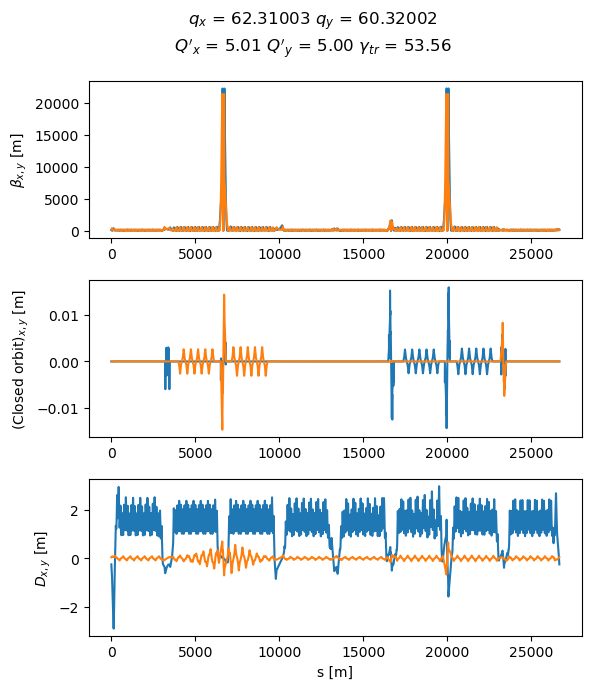

In [17]:
# Test custom s locations
# s_test = [2e3, 1e3, 3e3, 10e3]
# twats = tracker.twiss(at_s = s_test)
# for ii, ss in enumerate(s_test):
#     assert np.isclose(twats['s'][ii], ss, rtol=0, atol=1e-14)
#     i_prev = np.where(tw['s']<=ss)[0][-1]
#     assert np.isclose(twats['alfx'][ii], np.interp(ss, tw['s'], tw['alfx']),
#                       rtol=0, atol=1e-9)
#     assert np.isclose(twats['alfy'][ii], np.interp(ss, tw['s'], tw['alfy']),
#                      rtol=0, atol=1e-9)
#     assert np.isclose(twats['dpx'][ii], np.interp(ss, tw['s'], tw['dpx']),
#                       rtol=0, atol=1e-9)
#     assert np.isclose(twats['dpy'][ii], np.interp(ss, tw['s'], tw['dpy']),
#                       rtol=0, atol=1e-9)


# twmb19r5 = tw.get_twiss_init(at_element='mb.b19l5.b1')

# tw_part = tracker.twiss(ele_start='mb.b19l5.b1', ele_stop='mb.b19r5.b1',
#                         twiss_init=twmb19r5)



import matplotlib.pyplot as plt

plt.close('all')

fig1 = plt.figure(1, figsize=(6.4, 4.8*1.5))
spbet = plt.subplot(3,1,1)
spco = plt.subplot(3,1,2, sharex=spbet)
spdisp = plt.subplot(3,1,3, sharex=spbet)

spbet.plot(tw['s'], tw['betx'])
spbet.plot(tw['s'], tw['bety'])

spco.plot(tw['s'], tw['x'])
spco.plot(tw['s'], tw['y'])

spdisp.plot(tw['s'], tw['dx'])
spdisp.plot(tw['s'], tw['dy'])

spbet.set_ylabel(r'$\beta_{x,y}$ [m]')
spco.set_ylabel(r'(Closed orbit)$_{x,y}$ [m]')
spdisp.set_ylabel(r'$D_{x,y}$ [m]')
spdisp.set_xlabel('s [m]')

fig1.suptitle(
    r'$q_x$ = ' f'{tw["qx"]:.5f}' r' $q_y$ = ' f'{tw["qy"]:.5f}' '\n'
    r"$Q'_x$ = " f'{tw["dqx"]:.2f}' r" $Q'_y$ = " f'{tw["dqy"]:.2f}'
    r' $\gamma_{tr}$ = '  f'{1/np.sqrt(tw["momentum_compaction_factor"]):.2f}'
)

fig1.subplots_adjust(left=.15, right=.92, hspace=.27)
plt.show()

In [18]:
tw.keys()

dict_keys(['name', 's', 'x', 'px', 'y', 'py', 'zeta', 'delta', 'ptau', 'betx', 'bety', 'alfx', 'alfy', 'gamx', 'gamy', 'dx', 'dpx', 'dy', 'dzeta', 'dpy', 'mux', 'muy', 'muzeta', 'W_matrix', 'betx1', 'bety1', 'betx2', 'bety2', '_ebe_fields', 'particle_on_co', 'circumference', 'qx', 'qy', 'qs', 'dqx', 'dqy', 'slip_factor', 'momentum_compaction_factor', 'betz0', 'T_rev', 'c_minus', 'R_matrix', 'values_at'])

In [19]:
ip_idx = []

ip_idx.append(tw["name"].index("ip1"))
ip_idx.append(tw["name"].index("ip2"))
ip_idx.append(tw["name"].index("ip3"))
ip_idx.append(tw["name"].index("ip4"))
ip_idx.append(tw["name"].index("ip5"))
ip_idx.append(tw["name"].index("ip6"))
ip_idx.append(tw["name"].index("ip7"))
ip_idx.append(tw["name"].index("ip8"))

name_list = [
    "ip1", "ip2", "ip3", "ip4", "ip5", "ip6", "ip7", "ip8"
]


In [20]:
ip_s = [tw["s"][ii] for ii in ip_idx]
ip_betx = [tw["betx"][ii] for ii in ip_idx]
ip_bety = [tw["bety"][ii] for ii in ip_idx]
ip_gamx = [tw["gamx"][ii] for ii in ip_idx]
ip_gamy = [tw["gamy"][ii] for ii in ip_idx]
ip_deltax = [tw["dx"][ii] for ii in ip_idx]
ip_deltay = [tw["dy"][ii] for ii in ip_idx]

In [27]:
for name, s, betx, bety, gamx, gamy, dx, dy in zip(name_list, ip_s, ip_betx, ip_bety, ip_gamx, ip_gamy, ip_deltax, ip_deltay):
    print(f"{name}\t{betx:.2f}\t{bety:.2f}\t{gamx:.2f}\t{gamy:.2f}\t{s}")

ip1	0.15	0.15	6.85	6.58	19994.1624
ip2	10.32	9.97	0.10	0.10	23326.59898362185
ip3	117.83	219.64	0.05	0.04	0.0
ip4	229.59	303.99	0.01	0.00	3332.2842163781506
ip5	0.15	0.15	6.85	6.58	6664.5684327563
ip6	278.88	193.46	0.01	0.01	9997.005016378153
ip7	119.81	142.88	0.02	0.02	13329.441600000002
ip8	1.50	1.52	0.67	0.66	16650.65818362185


In [14]:
for name, s, betx, bety in zip(name_list, ip_s, ip_betx, ip_bety):
    print(f"{name}\t{s:.0f}\t\t{betx:.2f}\t{bety:.2f}")

ip1	19994		0.15	0.15
ip2	23327		10.32	9.97
ip3	0		117.83	219.64
ip4	3332		229.59	303.99
ip5	6665		0.15	0.15
ip6	9997		278.88	193.46
ip7	13329		119.81	142.88
ip8	16651		1.50	1.52


In [66]:
import scipy.constants as const

proton_mass = const.m_p # kg

# energy at 7 TeV
proton_energy = 7000e9 # eV
# tev to joule
proton_energy *= const.e # J

# get gamma
proton_gamma = proton_energy/proton_mass/const.c**2
print(proton_gamma)

# get beta
proton_beta = np.sqrt(1 - 1/proton_gamma**2)
print(proton_beta)

7460.522473522261
0.9999999910167907


In [63]:
beta_x = 117.83 # m
beta_y = 219.64 # m
beta_gamma = proton_beta * proton_gamma
nom_emittance = 0.000025 # m

phys_emittance_x = nom_emittance / (beta_gamma)
phys_emittance_y = nom_emittance / (beta_gamma)

In [70]:
print(0.001 / (np.sqrt(beta_x * phys_emittance_x)))
print(0.001 / (np.sqrt(beta_y * phys_emittance_y)))
print("")
print(0.001 / (np.sqrt(beta_x * phys_emittance_x / np.pi)))
print(0.001 / (np.sqrt(beta_y * phys_emittance_y / np.pi)))

1.5914268327510195
1.165625118572258

2.8207306181439127
2.066016730125597


In [34]:
val = (np.sqrt(117.830)*0.000025)
print(val)
print(0.001/val)

0.00027137381966578874
3.6849538442269525


In [71]:
import scipy.constants as const

def x_m_to_sigma(x_m):
    proton_mass = const.m_p # kg

    # energy at 7 TeV
    proton_energy = 7000e9 # eV
    # tev to joule
    proton_energy *= const.e # J

    # get gamma
    proton_gamma = proton_energy/proton_mass/const.c**2

    # get beta
    proton_beta = np.sqrt(1 - 1/proton_gamma**2)

    beta_x = 117.83 # m
    beta_y = 219.64 # m
    beta_gamma = proton_beta * proton_gamma
    nom_emittance = 0.000025 # m

    phys_emittance = nom_emittance / (beta_gamma)

    return x_m / (np.sqrt(beta_x * phys_emittance))

def y_m_to_sigma(y_m):
    proton_mass = const.m_p # kg

    # energy at 7 TeV
    proton_energy = 7000e9 # eV
    # tev to joule
    proton_energy *= const.e # J

    # get gamma
    proton_gamma = proton_energy/proton_mass/const.c**2

    # get beta
    proton_beta = np.sqrt(1 - 1/proton_gamma**2)

    beta_x = 117.83 # m
    beta_y = 219.64 # m
    beta_gamma = proton_beta * proton_gamma
    nom_emittance = 0.000025 # m

    phys_emittance = nom_emittance / (beta_gamma)

    return y_m / (np.sqrt(beta_y * phys_emittance))

In [72]:
const.c**2

8.987551787368176e+16